## Tic-Tac-Toe Agent - Geoffrey Pereira
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries

In [1]:
from TCGame_Env import TicTacToe
import collections
import numpy as np
import random
import pickle
import collections
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
## defining object for the TicTacToe environment created as MDP 
env = TicTacToe()

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]]
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

In [5]:
# Checking the default tic tac toe board positions
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [6]:
# Checking all the valid actions
valid_actions(env.state)


[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

#### Epsilon-greedy strategy

In [7]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # print(epsilon)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]    #Exploration: randomly choosing and action
    
    return action

#### Tracking the state-action pairs for checking convergence

In [8]:
# Initialising Q_dictionary and States_track
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [9]:
# Initialising states to be tracked
def initialise_tracking_states():
    Sample_Qvalues = [('x-x-x-x-x-x-x-x-x',(4,5)),('x-x-x-x-x-x-x-x-x',(1,7)),
                       ('x-3-x-x-1-x-x-x-x',(7,7)),('x-5-x-x-x-x-6-7-x',(8,1))]    #select some 4 Q-values
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [10]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [11]:
# definign a function for saving states tracking

def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action]) 

#### Define hyperparameters

In [12]:
#Defining parameters for the training

EPISODES = 30000             #setting the episodes
LR = 0.01                    #setting the learning rate
GAMMA = 0.9                  #discount factor
max_epsilon = 1.0            #Max Epsilon  
min_epsilon = 0.001          #Min Epsilon 
decay_rate = 0.001           #Epsilon decay rate
threshold = 200              # episodes after which states_tracked will be saved
policy_threshold = 300       # episodes after which Q dictionary/table will be saved

In [13]:
initialise_tracking_states()

## Build an agent that learns the game by Q-Learning

In [14]:
import time 
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe() # call the environment
    curr_state = env.state    
    done = False  
    add_to_dict(curr_state)  # adding the current state to dictionary

    while done != True:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)   # applying epislon method
        next_state, reward, done = env.step(curr_state, curr_action) # getting rewar
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)

        if done != True:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  
        # Here we get the action corresponding to max q-value of next state
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))

        # Next navigating to next state
        curr_state = next_state
        
     # States tracking   
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracking')

    if ((episode+1)% policy_threshold) == 0: 
        save_obj(Q_dict,'Policy_Q_dict')  
        

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracking')   
save_obj(Q_dict,'Policy_Q_dict')

In [15]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -0.9990214912477222,
              (0, 3): -0.9990163011914337,
              (0, 5): -0.9990194760089609,
              (0, 7): -0.9990456696244878,
              (0, 9): -0.9990231681979623,
              (1, 1): -0.999032761951979,
              (1, 3): -0.9990153671220164,
              (1, 5): -0.9990217923976927,
              (1, 7): -0.9990206980234115,
              (1, 9): -0.9990220201941389,
              (2, 1): -0.9991098888663467,
              (2, 3): -0.9990763423892405,
              (2, 5): -0.9990194881806423,
              (2, 7): -0.999097937467917,
              (2, 9): -0.9990158598744432,
              (3, 1): -0.9990179963409557,
              (3, 3): -0.9990199465858338,
              (3, 5): -0.9990298498049429,
              (3, 7): -0.9990198213004728,
              (3, 9): -0.9990196003866678,
              (4, 1): -0.9990906769455005,
              (4, 3): -0.9990225829848561,
              (4,

### Checking whether Q-values learnt by the agent have converged or not

<function matplotlib.pyplot.show(close=None, block=None)>

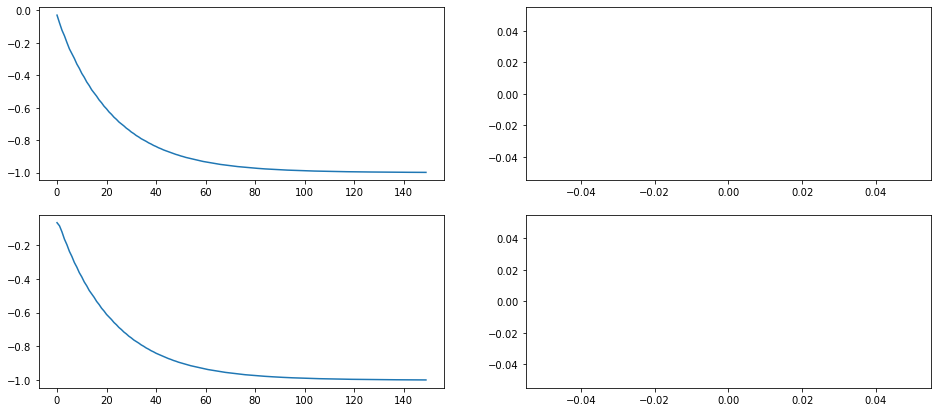

In [16]:
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(4,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(4,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-3-x-x-1-x-x-x-x'][(7,7)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-3-x-x-1-x-x-x-x'][(7,7)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(1,7)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(1,7)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-5-x-x-x-x-6-7-x'][(8,1)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['x-5-x-x-x-x-6-7-x'][(8,1)]))
plt.show




### Epsilon - decay check

In [17]:
time = np.arange(0,30000)
epsilon = []
for i in range(0,30000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*i))

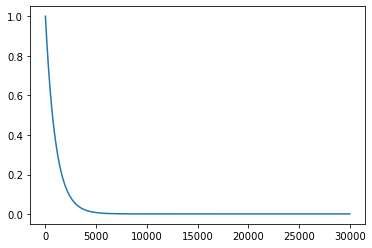

In [18]:
plt.plot(time, epsilon)
plt.show()

In [1]:
import pickle
path='States_tracking.pkl'   
f=open(path,'rb')
data=pickle.load(f)
 
print(data)
print(len(data))

defaultdict(<class 'dict'>, {'x-x-x-x-x-x-x-x-x': {(4, 5): [-0.029701, -0.07725530557207991, -0.12247897700103201, -0.15705680661607313, -0.19836941046095402, -0.23765728565289626, -0.26769663034560237, -0.29655230500043056, -0.33102824143031945, -0.3573883979152816, -0.3888827604671347, -0.41296321806251535, -0.44173386145213606, -0.4637317747928147, -0.49001425375043445, -0.5101097269957948, -0.5294133584143499, -0.5524767862361891, -0.5701109864761063, -0.5911798255774505, -0.6072889716421951, -0.6265357195457308, -0.6412517023181081, -0.6588339384859575, -0.6722772425621962, -0.6883389185508574, -0.7006196086876686, -0.7124163906331358, -0.7265108489777836, -0.7372874127497715, -0.750162943541547, -0.7600075204158654, -0.771769539864659, -0.7807627306335273, -0.7915075382652385, -0.7997229731425104, -0.8076146871060327, -0.8170434816909389, -0.824252698508824, -0.8328660649851163, -0.8394518088891034, -0.8473202677240936, -0.8533364583678962, -0.8605244312247748, -0.866020325142038